# PURPOSE OF THE NOTEBOOK

This notebook is used to identify domains using banksy

## Import packages

In [9]:
import warnings
warnings.filterwarnings("ignore") 
import os, time
import pandas as pd
import numpy as np
import random
import scipy.sparse as sparse
from scipy.sparse import csr_matrix, issparse
import scanpy as sc
import matplotlib.pyplot as plt
#os.chdir('../Banksy_py')
os.chdir('/media/sergio/xenium_b_and_heart/actual_repo/Xenium_benchmarking/Banksy_py')
from banksy.initialize_banksy import initialize_banksy
from banksy.run_banksy import run_banksy_multiparam
start = time.perf_counter_ns()
random_seed = 1234
cluster_algorithm = 'leiden'
np.random.seed(random_seed)
random.seed(random_seed)
#os.chdir('../notebooks/7_domain_exploration')
os.chdir('/media/sergio/xenium_b_and_heart/Xenium_benchmarking-main/notebooks/7_domain_exploration')

# Load data

In [10]:
saving_path=r'../../data/processed_adata/'
adata=sc.read('../../data/processed_adata/adata_multisection_nuclei_r1_with_annotations.h5ad')
adata=adata[adata.obs['replicate']=='1']
adata.X=adata.layers['raw']
adata.obsm['spatial']=np.array(adata.obs.loc[:,['x_centroid','y_centroid']])

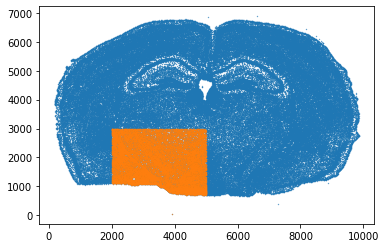

In [11]:
adata2=adata[(adata.obs['x_centroid']<5000)&(adata.obs['x_centroid']>2000)&(adata.obs['y_centroid']<3000)]
plt.scatter(adata.obs.loc[:,'x_centroid'],adata.obs.loc[:,'y_centroid'],s=0.1)
plt.scatter(adata2.obs.loc[:,'x_centroid'],adata2.obs.loc[:,'y_centroid'],s=0.1)
adata=adata2
ndoms=[]
for num in range(1,5):
    ndoms.append(len(np.unique(adata.obs['region_level'+str(num)])))

In [12]:
'''Main tunable variation in running the BANKSY algorithm'''
'''Input File'''
file_path = os.path.join("data", "starmap")
adata_filename = "starmap_BY3_1k.h5ad"
gcm_filename = ""
locations_filename = ""
load_adata_directly = True
'''Saving output figures'''
save_fig = False
output_folder = os.path.join(os.getcwd(), 'data', 'starmap', 'tmp_png', f'{cluster_algorithm}', f'seed{random_seed}')
c_map = 'tab20'
coord_keys = ('x', 'y', 'spatial')
num_clusters = 7
sample = 'starmap'
adata.var_names_make_unique()
manual_labels =  "smoothed_manual" # Ground truth annotations in pd.DataFrame
annotation_key = "Class" # Key to access annotations in adata.obs[annotation_keys]

In [15]:
resolutions = [.9] # clustering resolution for Leiden clustering
pca_dims = [20] # number of dimensions to keep after PCA
lambda_list = [.8] # lambda
k_geom = 15 # 15 spatial neighbours
max_m = 1 # use AGF
nbr_weight_decay = "scaled_gaussian" # can also be "reciprocal", "uniform" or "ranked"

In [16]:
resolutions = [2.0] # clustering resolution for Leiden clustering

In [25]:
import random
allcolors=[]
for s in range(0,60):
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    allcolors.append(color)


Median distance to closest cell = 12.936304682532631

---- Ran median_dist_to_nearest_neighbour in 0.06 s ----

---- Ran generate_spatial_distance_graph in 0.11 s ----

---- Ran row_normalize in 0.09 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 0.79 s ----

----- Plotting Edge Histograms for m = 0 -----

Edge weights (distances between cells): median = 26.6291336943243, mode = 16.614609349924244

---- Ran plot_edge_histogram in 0.06 s ----


Edge weights (weights between cells): median = 0.05927054909357662, mode = 0.03400456388293113

---- Ran plot_edge_histogram in 0.06 s ----

---- Ran generate_spatial_distance_graph in 0.17 s ----

---- Ran theta_from_spatial_graph in 0.17 s ----

---- Ran row_normalize in 0.09 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 1.05 s ----

----- Plotting Edge Histograms for m = 1 -----

Edge weights (distances between cells): median = 37.199855455340455, mode = 31.644313199929975

---- Ran plot_edge_histogram in 0.07 s ----


Edge

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.10  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.10         0.1           6   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.10  Label object:\nNumber of labels: 6, number of ...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.10  [[[View of AnnData object with n_obs × n_vars ...   

                                       ari  
scaled_gaussian_pc20_nc0.80_r0.10  0.12569

Anndata AxisArrays with keys: reduced_pc_20

Median distance to closest cell = 12.936304682532631

---- Ran median_dist_to_nearest_neighbour in 0.05 s ----

---- Ran generate_spatial_distance_graph in 0.11 s ----

---- Ran row_normalize in 0.09 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 0.80 s ----

----- Plotting Edge Histograms for m = 0 -----

Edge weights (distances between cells): median = 26.6291336943243, mode = 16.614609349924244

---- Ran plot_edge_histogram in 0.06 s ----


Edge weights (weights between cells): median = 0.05927054909357662, mode = 0.03400456388293113

---- Ran plot_edge_histogram in 0.06 s ----

---- Ran generate_spatial_distance_graph in 0.17 s ----

---- Ran theta_from_spatial_graph in 0.17 s ----

---- Ran row_normalize in 0.09 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 1.04 s ----

----- Plotting Edge Histograms for m = 1 -----

Edge weights (distances between cells): median = 37.199855455340455, mode = 31.644313199929975

---- R

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.05  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.05        0.05           4   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.05  Label object:\nNumber of labels: 4, number of ...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.05  [[[View of AnnData object with n_obs × n_vars ...   

                                       ari  
scaled_gaussian_pc20_nc0.80_r0.05  0.10792

Anndata AxisArrays with keys: reduced_pc_20
Runtime Jun-05-2024-08-45

248 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Angpt1', 'Ano1',
       ...
       'Trp73', 'Trpc4', 'Unc13c', 'Vat1l', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', name='gene_id', length=248)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <18715x18715 sparse matrix of type '<class 'numpy.float64'>'
	with 280725 stored elements in Compressed Sparse Row format>, 1: <18715x18715 sparse matrix of type '<class 'numpy.complex128'>'
	with 561450 stored elements in Compressed Sparse Row format>}, 'norm_counts_concatenated': array([[1.        , 2.        , 0.        , ..., 0.07975567, 0.09249284,
        0.03758149],
       [0.        , 0.        , 1.        , ..., 0.16518035, 0.27579362,
        0.05121135],
       [4.        , 2.        , 0.        , ..., 0.10734163, 0.16229076,

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.10  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.10         0.1           5   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.10  Label object:\nNumber of labels: 5, number of ...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.10  [[[View of AnnData object with n_obs × n_vars ...   

                                        ari  
scaled_gaussian_pc20_nc0.80_r0.10  0.131995

Anndata AxisArrays with keys: reduced_pc_20
Runtime Jun-05-2024-08-45

248 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Angpt1', 'Ano1',
       ...
       'Trp73', 'Trpc4', 'Unc13c', 'Vat1l', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', name='gene_id', length=248)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <18715x18715 sparse matrix of type '<class 'numpy.float64'>'
	with 280725 stored elements in Compressed Sparse Row format>, 1: <18715x18715 sparse matrix of type '<class 'numpy.complex128'>'
	with 561450 stored elements in Compressed Sparse Row format>}, 'norm_counts_concatenated': array([[1.        , 2.        , 0.        , ..., 0.07975567, 0.09249284,
        0.03758149],
       [0.        , 0.        , 1.        , ..., 0.16518035, 0.27579362,
        0.05121135],
       [4.        , 2.        , 0.        , ..., 0.10734163, 0.16229076,

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.15  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.15        0.15           8   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.15  Label object:\nNumber of labels: 8, number of ...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.15  [[[View of AnnData object with n_obs × n_vars ...   

                                        ari  
scaled_gaussian_pc20_nc0.80_r0.15  0.164847

Anndata AxisArrays with keys: reduced_pc_20
Runtime Jun-05-2024-08-45

248 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Angpt1', 'Ano1',
       ...
       'Trp73', 'Trpc4', 'Unc13c', 'Vat1l', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', name='gene_id', length=248)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <18715x18715 sparse matrix of type '<class 'numpy.float64'>'
	with 280725 stored elements in Compressed Sparse Row format>, 1: <18715x18715 sparse matrix of type '<class 'numpy.complex128'>'
	with 561450 stored elements in Compressed Sparse Row format>}, 'norm_counts_concatenated': array([[1.        , 2.        , 0.        , ..., 0.07975567, 0.09249284,
        0.03758149],
       [0.        , 0.        , 1.        , ..., 0.16518035, 0.27579362,
        0.05121135],
       [4.        , 2.        , 0.        , ..., 0.10734163, 0.16229076,

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.20  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.20         0.2           9   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.20  Label object:\nNumber of labels: 9, number of ...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.20  [[[View of AnnData object with n_obs × n_vars ...   

                                        ari  
scaled_gaussian_pc20_nc0.80_r0.20  0.170371

Anndata AxisArrays with keys: reduced_pc_20

Median distance to closest cell = 12.936304682532631

---- Ran median_dist_to_nearest_neighbour in 0.05 s ----

---- Ran generate_spatial_distance_graph in 0.11 s ----

---- Ran row_normalize in 0.09 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 0.79 s ----

----- Plotting Edge Histograms for m = 0 -----

Edge weights (distances between cells): median = 26.6291336943243, mode = 16.614609349924244

---- Ran plot_edge_histogram in 0.06 s ----


Edge weights (weights between cells): median = 0.05927054909357662, mode = 0.03400456388293113

---- Ran plot_edge_histogram in 0.06 s ----

---- Ran generate_spatial_distance_graph in 0.17 s ----

---- Ran theta_from_spatial_graph in 0.17 s ----

---- Ran row_normalize in 0.09 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 1.03 s ----

----- Plotting Edge Histograms for m = 1 -----

Edge weights (distances between cells): median = 37.199855455340455, mode = 31.644313199929975

---- R

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.25  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.25        0.25          10   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.25  Label object:\nNumber of labels: 10, number of...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.25  [[[View of AnnData object with n_obs × n_vars ...   

                                        ari  
scaled_gaussian_pc20_nc0.80_r0.25  0.163746

Anndata AxisArrays with keys: reduced_pc_20
Runtime Jun-05-2024-08-46

248 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Angpt1', 'Ano1',
       ...
       'Trp73', 'Trpc4', 'Unc13c', 'Vat1l', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', name='gene_id', length=248)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <18715x18715 sparse matrix of type '<class 'numpy.float64'>'
	with 280725 stored elements in Compressed Sparse Row format>, 1: <18715x18715 sparse matrix of type '<class 'numpy.complex128'>'
	with 561450 stored elements in Compressed Sparse Row format>}, 'norm_counts_concatenated': array([[1.        , 2.        , 0.        , ..., 0.07975567, 0.09249284,
        0.03758149],
       [0.        , 0.        , 1.        , ..., 0.16518035, 0.27579362,
        0.05121135],
       [4.        , 2.        , 0.        , ..., 0.10734163, 0.16229076,

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.30  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.30         0.3          13   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.30  Label object:\nNumber of labels: 13, number of...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.30  [[[View of AnnData object with n_obs × n_vars ...   

                                        ari  
scaled_gaussian_pc20_nc0.80_r0.30  0.178309

Anndata AxisArrays with keys: reduced_pc_20
Runtime Jun-05-2024-08-47

248 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Angpt1', 'Ano1',
       ...
       'Trp73', 'Trpc4', 'Unc13c', 'Vat1l', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', name='gene_id', length=248)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <18715x18715 sparse matrix of type '<class 'numpy.float64'>'
	with 280725 stored elements in Compressed Sparse Row format>, 1: <18715x18715 sparse matrix of type '<class 'numpy.complex128'>'
	with 561450 stored elements in Compressed Sparse Row format>}, 'norm_counts_concatenated': array([[1.        , 2.        , 0.        , ..., 0.07975567, 0.09249284,
        0.03758149],
       [0.        , 0.        , 1.        , ..., 0.16518035, 0.27579362,
        0.05121135],
       [4.        , 2.        , 0.        , ..., 0.10734163, 0.16229076,

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.35  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.35        0.35          13   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.35  Label object:\nNumber of labels: 13, number of...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.35  [[[View of AnnData object with n_obs × n_vars ...   

                                        ari  
scaled_gaussian_pc20_nc0.80_r0.35  0.184676

Anndata AxisArrays with keys: reduced_pc_20
Runtime Jun-05-2024-08-47

248 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Angpt1', 'Ano1',
       ...
       'Trp73', 'Trpc4', 'Unc13c', 'Vat1l', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', name='gene_id', length=248)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <18715x18715 sparse matrix of type '<class 'numpy.float64'>'
	with 280725 stored elements in Compressed Sparse Row format>, 1: <18715x18715 sparse matrix of type '<class 'numpy.complex128'>'
	with 561450 stored elements in Compressed Sparse Row format>}, 'norm_counts_concatenated': array([[1.        , 2.        , 0.        , ..., 0.07975567, 0.09249284,
        0.03758149],
       [0.        , 0.        , 1.        , ..., 0.16518035, 0.27579362,
        0.05121135],
       [4.        , 2.        , 0.        , ..., 0.10734163, 0.16229076,

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.40  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.40         0.4          14   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.40  Label object:\nNumber of labels: 14, number of...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.40  [[[View of AnnData object with n_obs × n_vars ...   

                                        ari  
scaled_gaussian_pc20_nc0.80_r0.40  0.191666

Anndata AxisArrays with keys: reduced_pc_20
Runtime Jun-05-2024-08-47

248 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Angpt1', 'Ano1',
       ...
       'Trp73', 'Trpc4', 'Unc13c', 'Vat1l', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', name='gene_id', length=248)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <18715x18715 sparse matrix of type '<class 'numpy.float64'>'
	with 280725 stored elements in Compressed Sparse Row format>, 1: <18715x18715 sparse matrix of type '<class 'numpy.complex128'>'
	with 561450 stored elements in Compressed Sparse Row format>}, 'norm_counts_concatenated': array([[1.        , 2.        , 0.        , ..., 0.07975567, 0.09249284,
        0.03758149],
       [0.        , 0.        , 1.        , ..., 0.16518035, 0.27579362,
        0.05121135],
       [4.        , 2.        , 0.        , ..., 0.10734163, 0.16229076,

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.45  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.45        0.45          14   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.45  Label object:\nNumber of labels: 14, number of...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.45  [[[View of AnnData object with n_obs × n_vars ...   

                                       ari  
scaled_gaussian_pc20_nc0.80_r0.45  0.20509

Anndata AxisArrays with keys: reduced_pc_20
Runtime Jun-05-2024-08-48

248 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Angpt1', 'Ano1',
       ...
       'Trp73', 'Trpc4', 'Unc13c', 'Vat1l', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', name='gene_id', length=248)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <18715x18715 sparse matrix of type '<class 'numpy.float64'>'
	with 280725 stored elements in Compressed Sparse Row format>, 1: <18715x18715 sparse matrix of type '<class 'numpy.complex128'>'
	with 561450 stored elements in Compressed Sparse Row format>}, 'norm_counts_concatenated': array([[1.        , 2.        , 0.        , ..., 0.07975567, 0.09249284,
        0.03758149],
       [0.        , 0.        , 1.        , ..., 0.16518035, 0.27579362,
        0.05121135],
       [4.        , 2.        , 0.        , ..., 0.10734163, 0.16229076,

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.50  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.50         0.5          14   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.50  Label object:\nNumber of labels: 14, number of...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.50  [[[View of AnnData object with n_obs × n_vars ...   

                                        ari  
scaled_gaussian_pc20_nc0.80_r0.50  0.204161

Anndata AxisArrays with keys: reduced_pc_20
Runtime Jun-05-2024-08-48

248 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Angpt1', 'Ano1',
       ...
       'Trp73', 'Trpc4', 'Unc13c', 'Vat1l', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', name='gene_id', length=248)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <18715x18715 sparse matrix of type '<class 'numpy.float64'>'
	with 280725 stored elements in Compressed Sparse Row format>, 1: <18715x18715 sparse matrix of type '<class 'numpy.complex128'>'
	with 561450 stored elements in Compressed Sparse Row format>}, 'norm_counts_concatenated': array([[1.        , 2.        , 0.        , ..., 0.07975567, 0.09249284,
        0.03758149],
       [0.        , 0.        , 1.        , ..., 0.16518035, 0.27579362,
        0.05121135],
       [4.        , 2.        , 0.        , ..., 0.10734163, 0.16229076,

decay  lambda_param  num_pcs  \
scaled_gaussian_pc20_nc0.80_r0.55  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
scaled_gaussian_pc20_nc0.80_r0.55        0.55          15   

                                                                              labels  \
scaled_gaussian_pc20_nc0.80_r0.55  Label object:\nNumber of labels: 15, number of...   

                                                                               adata  \
scaled_gaussian_pc20_nc0.80_r0.55  [[[View of AnnData object with n_obs × n_vars ...   

                                       ari  
scaled_gaussian_pc20_nc0.80_r0.55  0.19819

Anndata AxisArrays with keys: reduced_pc_20


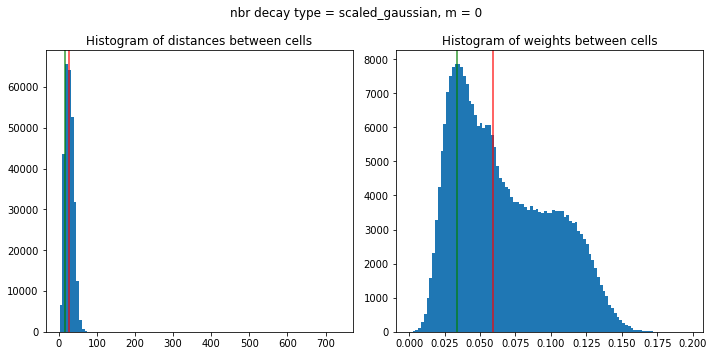

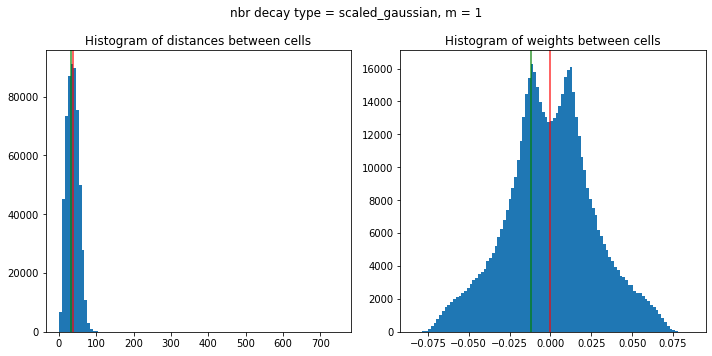

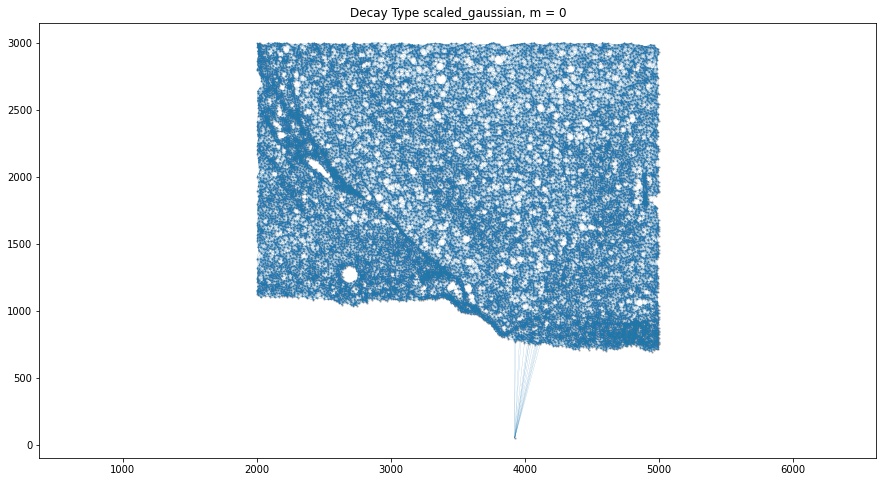

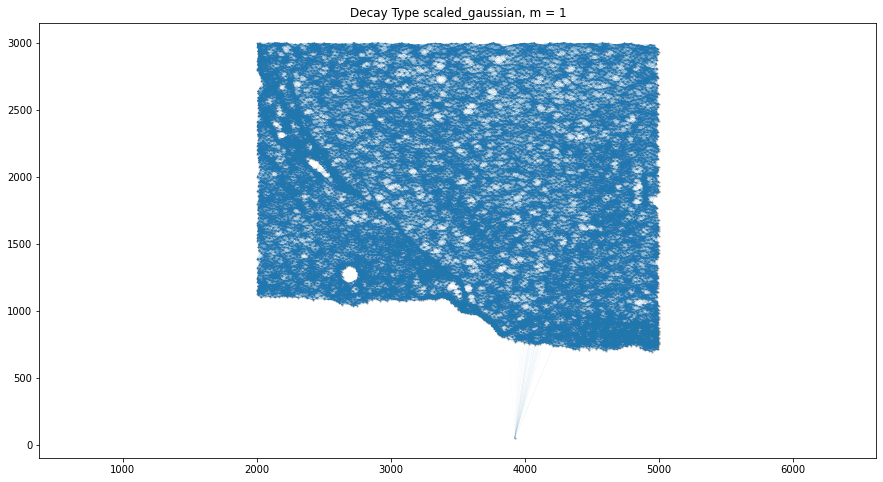

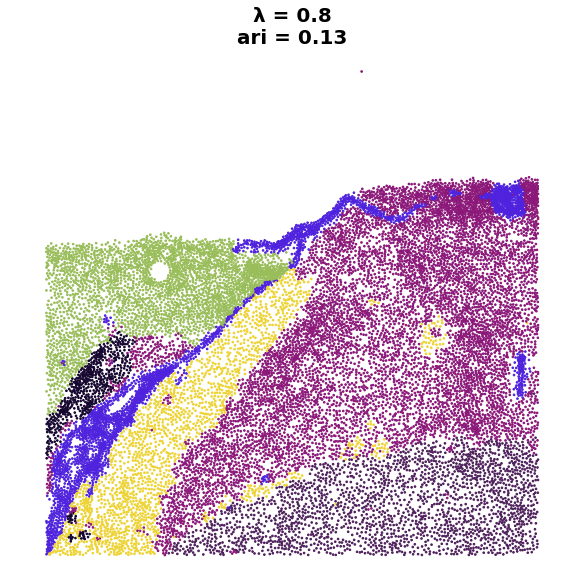

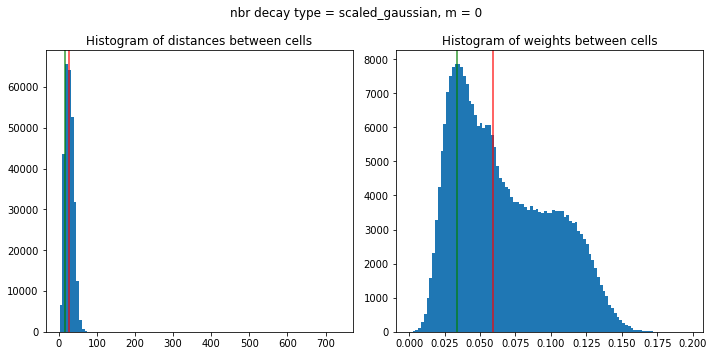

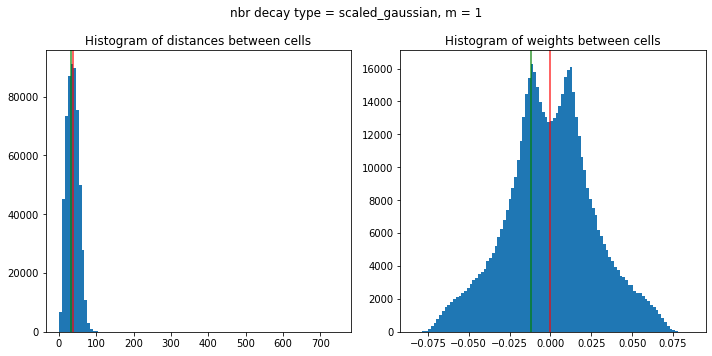

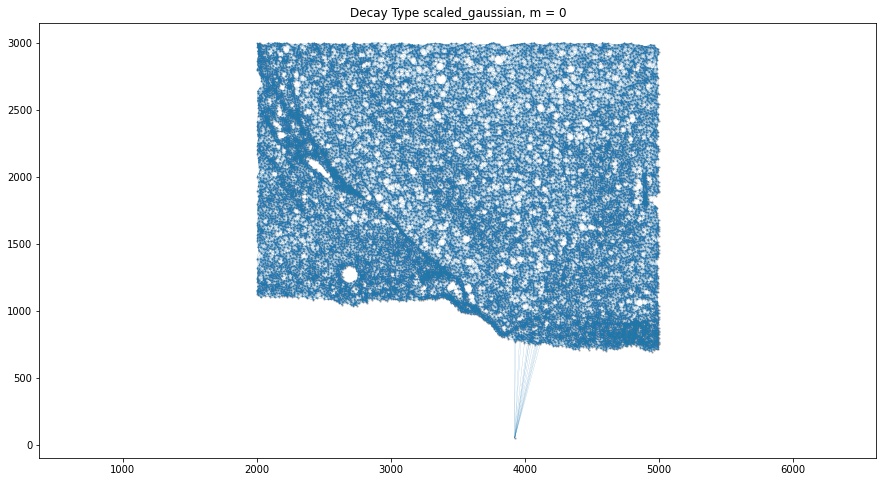

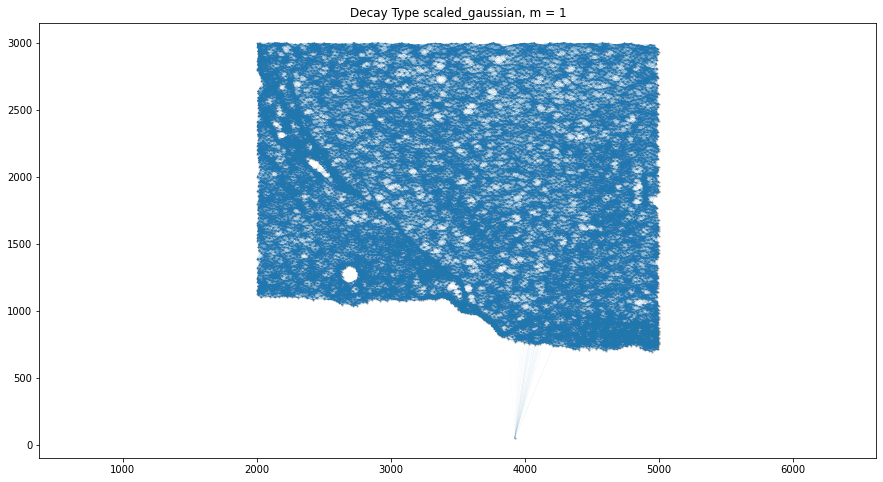

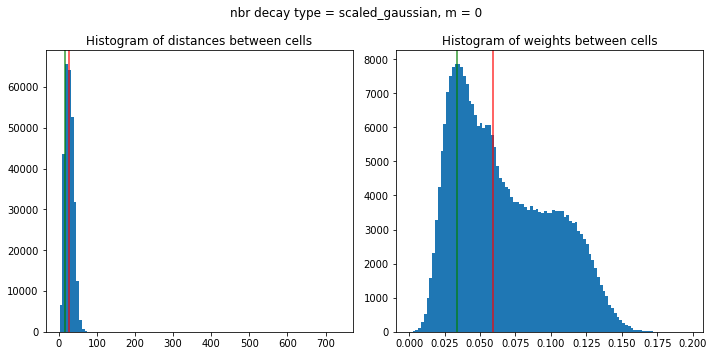

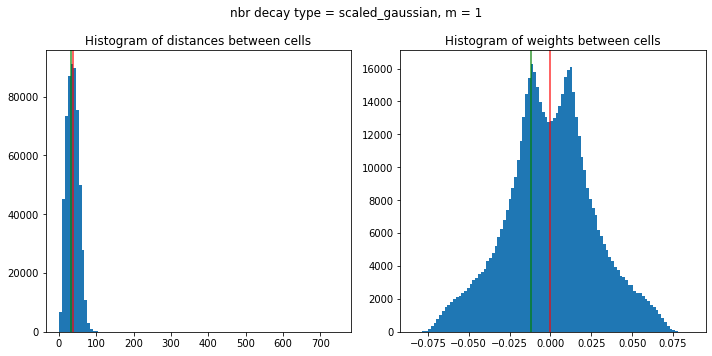

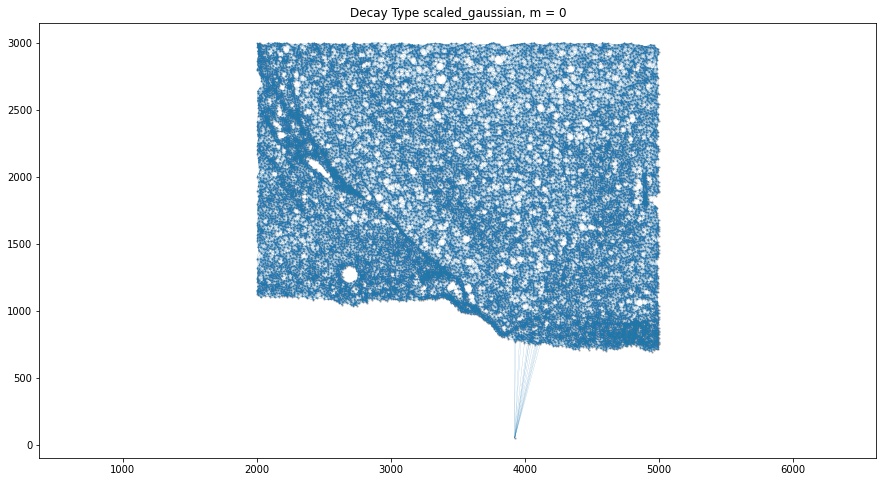

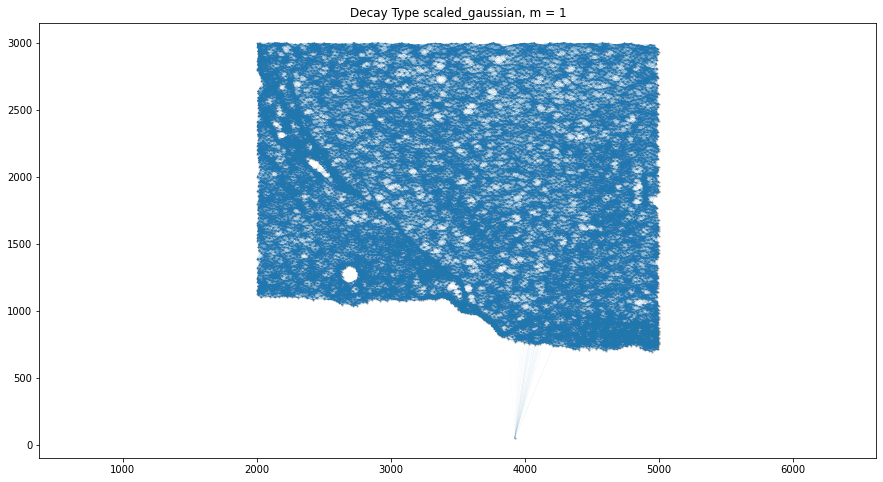

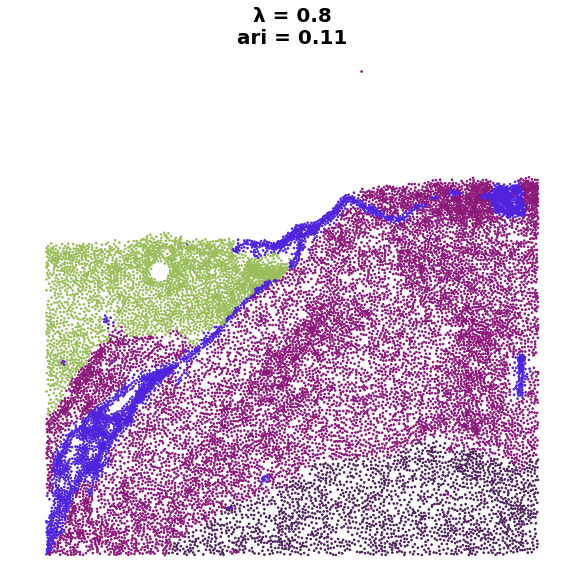

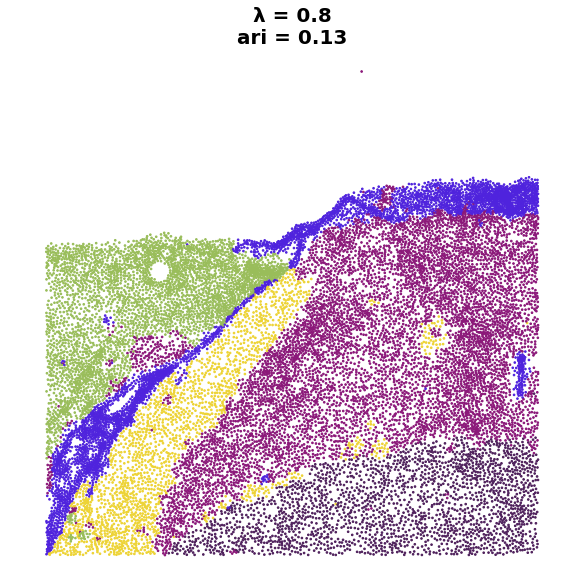

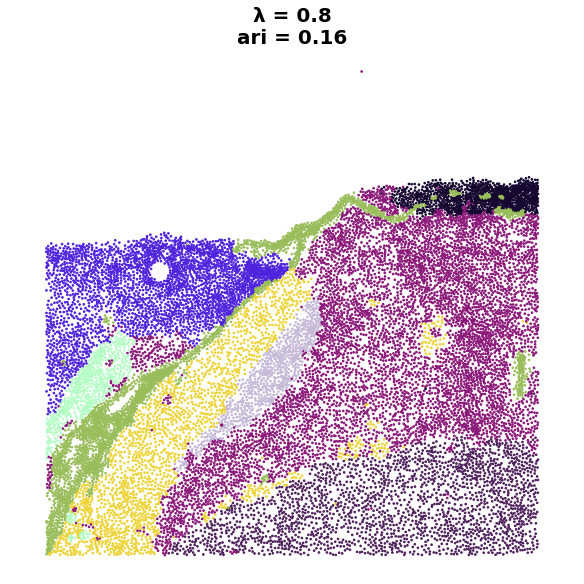

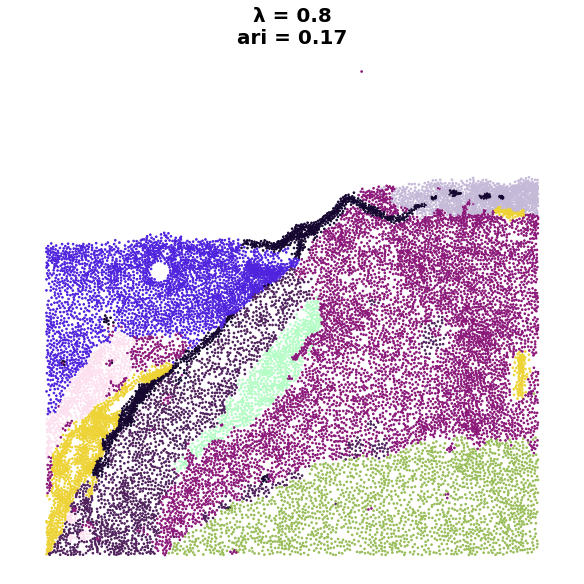

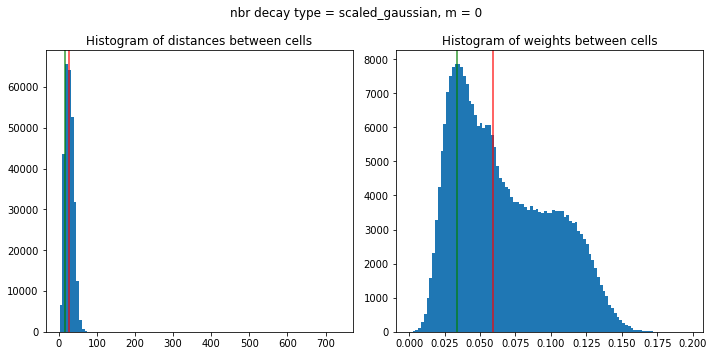

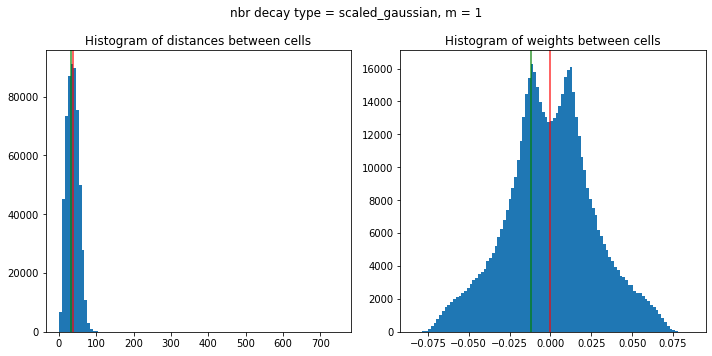

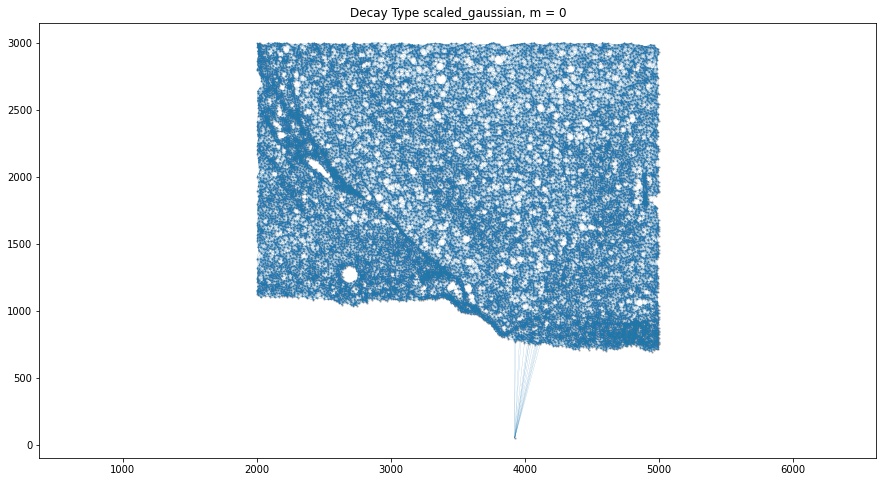

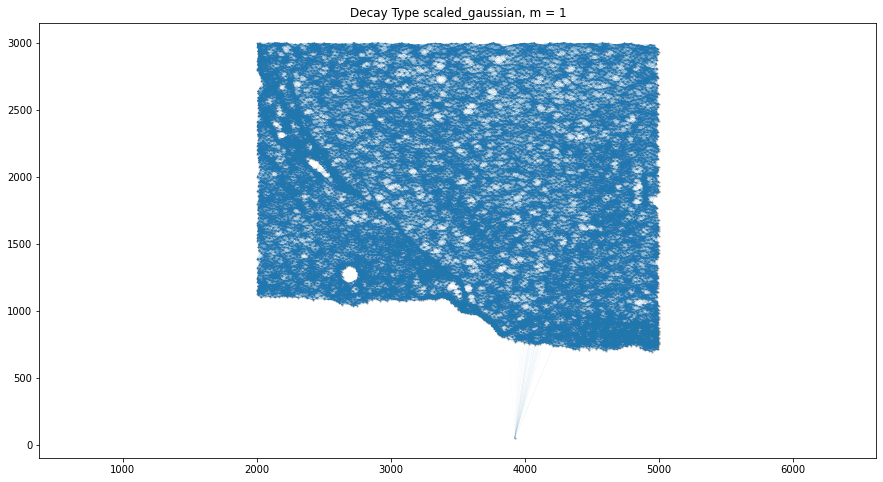

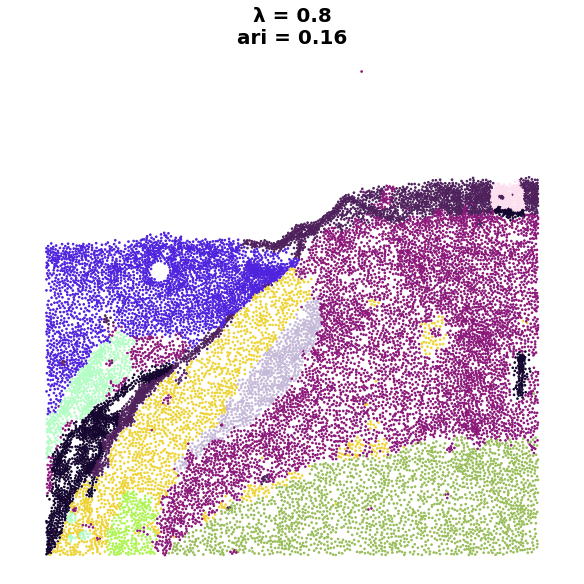

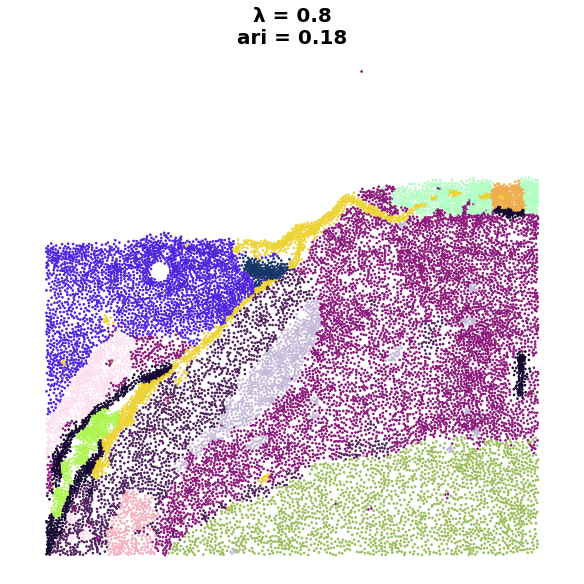

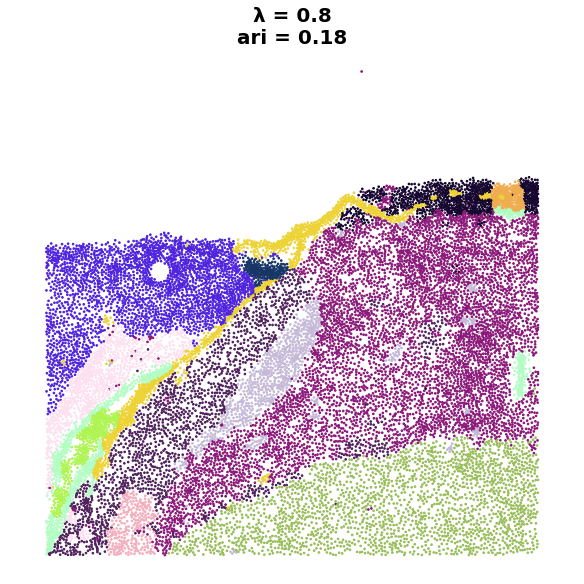

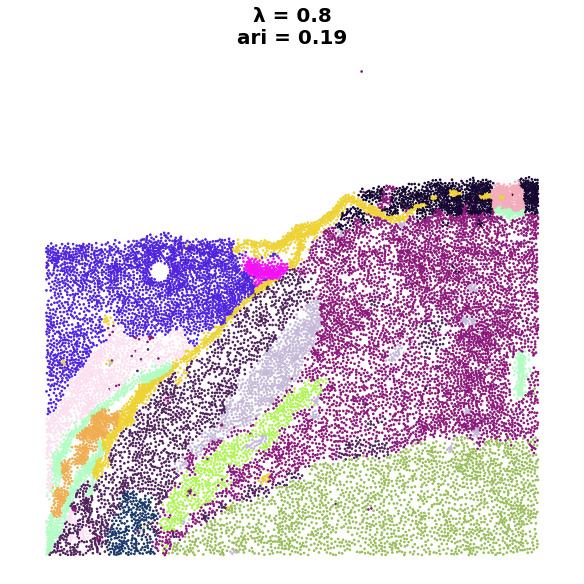

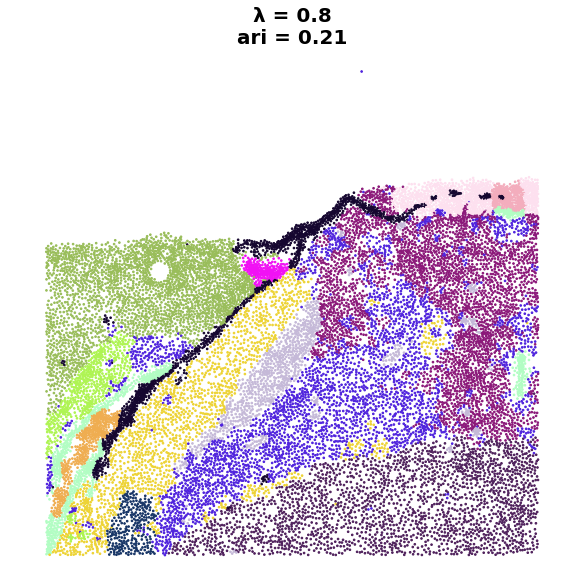

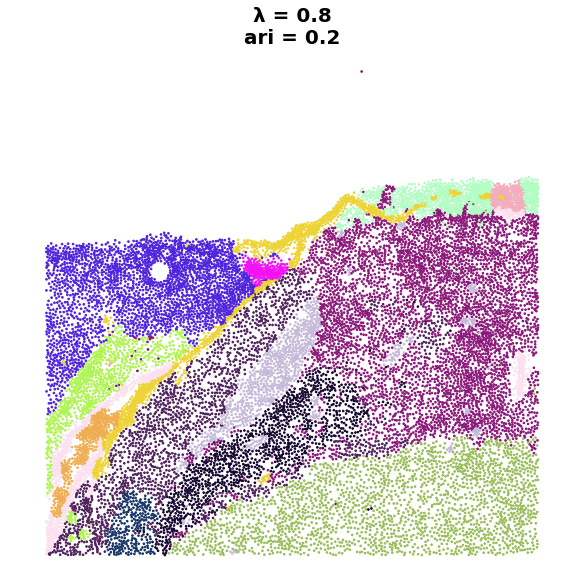

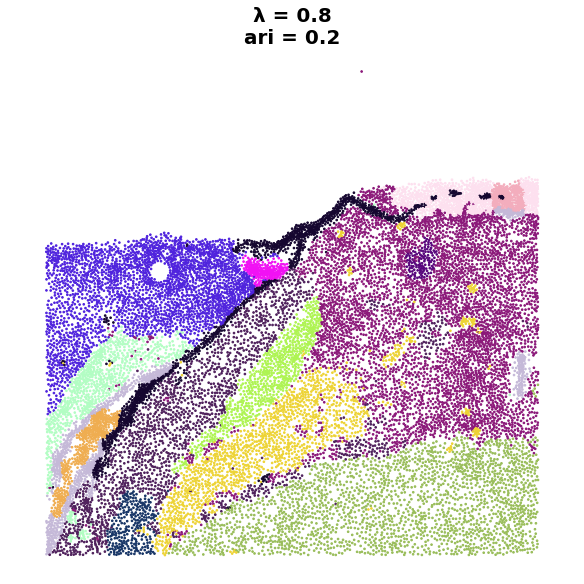

In [31]:
nclust=0
for target_clust in ndoms:
    banksy_dict = initialize_banksy(
        adata,
        coord_keys,
        k_geom,
        nbr_weight_decay=nbr_weight_decay,
        max_m=max_m,
        plt_edge_hist=True,
        plt_nbr_weights=True,
        plt_agf_angles=False,
        plt_theta=False)
    adata.obs['x']=adata.obs['x_centroid']
    adata.obs['y']=adata.obs['y_centroid']
    
    while abs(target_clust-nclust)>1:
        results_df = run_banksy_multiparam(
            adata,
            banksy_dict,
            lambda_list,
            resolutions,
            max_m = max_m,
            filepath = output_folder,
            key = coord_keys,
            pca_dims = pca_dims,
            annotation_key = annotation_key,
            max_labels = num_clusters,
            cluster_algorithm = cluster_algorithm,
            match_labels = False,
            savefig = False,
            add_nonspatial = False,
            variance_balance = False,
            color_list=allcolors
        )
        adata_res=results_df.loc[results_df.index[0],'adata']
        res=adata_res.obs.loc[:,['cell_id',results_df.index[0]]]
        res.columns=['cell_id','spatial_domain']
        nclust=len(res['spatial_domain'].unique())
        if nclust>target_clust:
            resolutions[0]=resolutions[0]-0.05
        else:
            resolutions[0]=resolutions[0]+0.05 
    res.to_csv('../../figures/7.spatial_architecture/domains_predicted/ROI2/'+str(target_clust)+'/predicted_BANKSY.csv')
